# Сравнение оценок. Эффективные оценки.

## Задача 1

<div style="text-align: justify">
(К теоретической задаче 1) Сгенерируйте $M=100$ выборок $X_1, \ldots, X_{1000}$ из равномерного распределения на отрезке $[0, \theta]$ (возьмите три произвольных положительных значения $\theta$). Для каждой выборки $X_1,\ldots,X_n$ для всех $n \leqslant 1000$ посчитайте оценки параметра $\theta$ из теоретической задачи: $2 \overline{X}, (n + 1) X_{(1)}, X_{(1)} + X_{(n)}, \frac {n + 1} {n} X_{(n)}$. Посчитайте для всех полученных оценок $\hat\theta$ квадратичную функцию потерь $(\hat\theta-\theta)^2$ и для каждого фиксированного $n$ усредните по выборкам. Для каждого из трех значений $\theta$ постройте графики усредненных функций потерь в зависимости от $n$.
</div>

### Решение задачи

In [1]:
#импортируем необходимые модули
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [2]:
#задаём количество выборок и размер каждой выборки
M = 100
N = 1000

In [3]:
#задаём массив значений параметра theta равномерного распределения
theta = np.array([1., 5., 20.])

#генерируем M выборок размера N c заданными значениями параметра theta
sample_1 = sts.uniform.rvs(loc = 0., scale = theta[0], size = (M, N))
sample_2 = sts.uniform.rvs(loc = 0., scale = theta[1], size = (M, N))
sample_3 = sts.uniform.rvs(loc = 0., scale = theta[2], size = (M, N))

In [4]:
#функция для подсчета оценок из условий задания
def make_estimators(sample):
    est_1 = np.zeros((M, N))
    est_2 = np.zeros((M, N))
    est_3 = np.zeros((M, N))
    est_4 = np.zeros((M, N))

    for i in range(M):  
        est_1[i] = np.array([2 * sample[i][:n].mean() for n in range(1, N + 1)])
        est_2[i] = np.array([(n + 1) * sample[i][:n].min() for n in range(1, N + 1)])
        est_3[i] = np.array([sample[i][:n].min() + sample[i][:n].max() for n in range(1, N + 1)])
        est_4[i] = np.array([(n + 1) / n * sample[i][:n].max() for n in range(1, N + 1)])

    return est_1, est_2, est_3, est_4

In [5]:
#функция для подсчета усредненной по выборкам квадратичной функции потерь
def calculate_loss_functions(theta, est_1, est_2, est_3, est_4):
    loss_func_1 = np.mean((est_1 - theta) ** 2, axis = 0)
    loss_func_2 = np.mean((est_2 - theta) ** 2, axis = 0)
    loss_func_3 = np.mean((est_3 - theta) ** 2, axis = 0)
    loss_func_4 = np.mean((est_4 - theta) ** 2, axis = 0)
    return loss_func_1, loss_func_2, loss_func_3, loss_func_4

In [6]:
#функция для построения графика усредненной по выборкам квадратичной функции потерь в зависимости от размера выборки
def make_plots(loss_func_1, loss_func_2, loss_func_3, loss_func_4, plot_all):
    sample_sizes = np.arange(1, N + 1, 1)
    plt.figure(figsize = (12, 7))
    if plot_all == False:
        plt.ylim(0, np.max(3 * loss_func_1[-200:]))
    plt.plot(sample_sizes, loss_func_1, label = r'$2 \overline{X}$')
    plt.plot(sample_sizes, loss_func_2, label = r'$(n + 1)X_{(1)}$')
    plt.plot(sample_sizes, loss_func_3, label = r'$X_{(1)} + X_{(n)}$')
    plt.plot(sample_sizes, loss_func_4, label = r'$\frac{n + 1}{n}X_{(n)}$')
    plt.title(r'Dependency of averaged loss function from the sample size', fontsize = 14)
    plt.xlabel('Sample size', fontsize = 12)
    plt.ylabel('Average loss function', fontsize = 12)
    plt.legend(loc = 'best', prop = {'size': 12})
    plt.grid()
    plt.show()

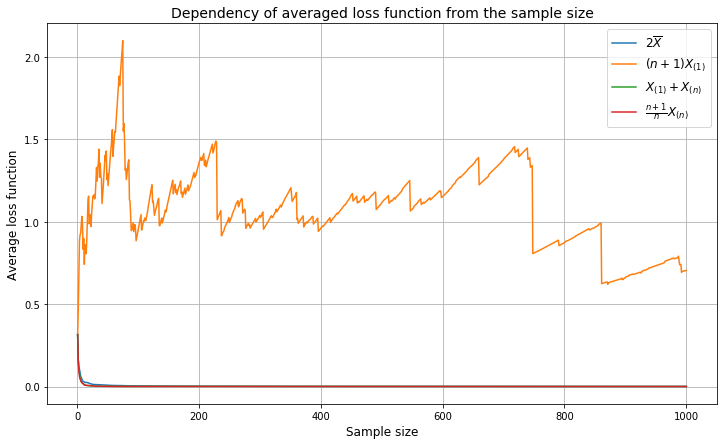

In [7]:
#подсчет необходимых оценок
est_1, est_2, est_3, est_4 = make_estimators(sample_1)

#подсчет усредненных по выборкам квадратичных функций потерь
loss_func_1, loss_func_2, loss_func_3, loss_func_4 = calculate_loss_functions(theta[0], est_1, est_2, est_3, est_4)

#построение графиков
make_plots(loss_func_1, loss_func_2, loss_func_3, loss_func_4, plot_all = True)

Видно, что для оценки $(n + 1) X_{(1)}$ значение усредненной функции потерь не стремится к нулю с ростом размера выборки, поэтому далее будем строить графики в таком масштабе, в котором лучше виден характер изменения трех других оценок (для большей наглядности).

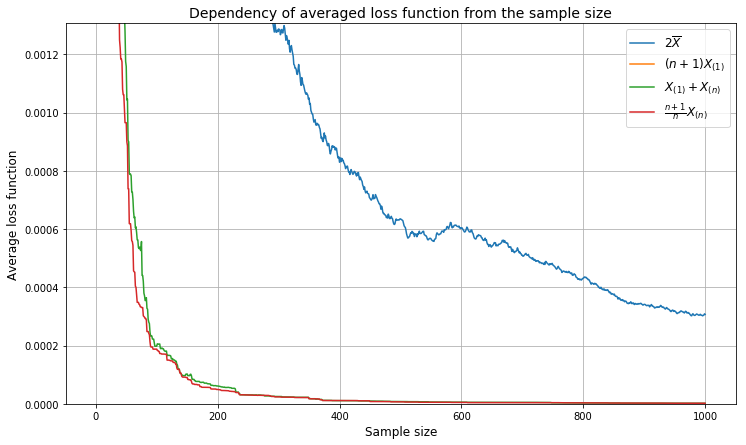

In [8]:
#еще раз построим те же графики, но в другом масштабе
make_plots(loss_func_1, loss_func_2, loss_func_3, loss_func_4, plot_all = False)

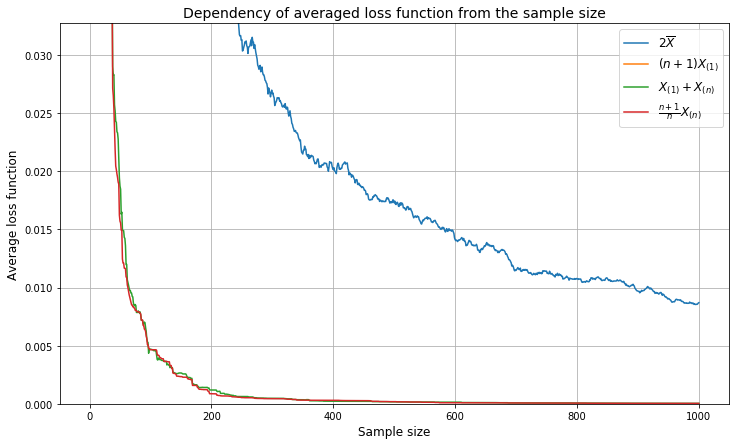

In [9]:
#подсчет необходимых оценок
est_1, est_2, est_3, est_4 = make_estimators(sample_2)

#подсчет усредненных по выборкам квадратичных функций потерь
loss_func_1, loss_func_2, loss_func_3, loss_func_4 = calculate_loss_functions(theta[1], est_1, est_2, est_3, est_4)

#построение графиков
make_plots(loss_func_1, loss_func_2, loss_func_3, loss_func_4, plot_all = False)

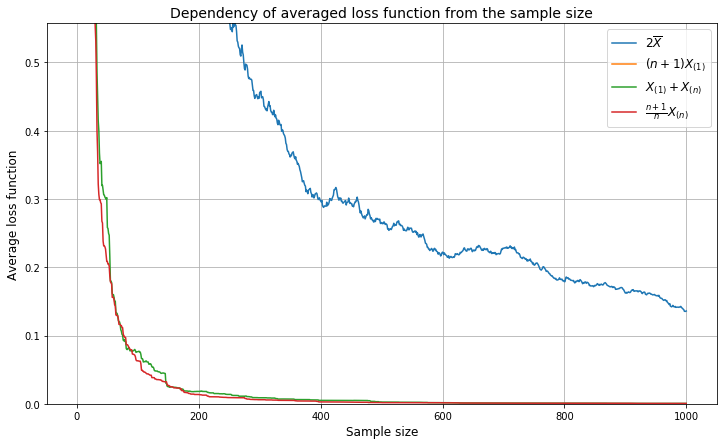

In [10]:
#подсчет необходимых оценок
est_1, est_2, est_3, est_4 = make_estimators(sample_3)

#подсчет усредненных по выборкам квадратичных функций потерь
loss_func_1, loss_func_2, loss_func_3, loss_func_4 = calculate_loss_functions(theta[2], est_1, est_2, est_3, est_4)

#построение графиков
make_plots(loss_func_1, loss_func_2, loss_func_3, loss_func_4, plot_all = False)

### Выводы

<div style="text-align: justify">
По полученным графикам можно сделать вывод, что оценки параметра $\theta$, равные $\frac{n + 1}{n} X_{(n)}$ и $X_{(1)} + X_{(n)}$, лучше оценок $2 \overline{X}$ и $(n + 1) X_{(1)}$ (при этом оценка $2 \overline{X}$ лучше $(n + 1) X_{(1)}$) в равномерном подходе с квадратичной функцией потерь.  
</div>

## Задача 2

<div style="text-align: justify">
(К теоретическим задачам 3, 4, 5) В задаче требуется экспериментально проверить утверждение, что для любой несмещенной оценки $\widehat{\theta} (X)$ параметра $\theta$ выполнено неравенство Рао-Крамера $$\mathsf{D}_{\theta} \widehat{\theta} (X) \geqslant \frac {1} {I_X (\theta)}.$$ Cгенерируйте выборку $X_1, \ldots, X_N$, $N=1000$, из распределений в теоретических задачах (биномиальное распределение, экспоненциальное распределение и нормальное распределение с неизвестным математическим ожиданием). В случае биномиального распределения $m=50$, в случае нормального распределения с неизвестным математическим ожиданием $\sigma^2=2.1$. Второй параметр (единственный в случае экспоненциального распределения) выберите случайно из распределения $R[0,1]$. Для всех $n \leqslant N$ посчитайте значение эффективной оценки и бутстрепную оценку дисперсии для эффективной оценки (параметрический бутстреп, количество бутстрепных выборок равно $500,$ размер каждой равен $n$). Сделайте то же самое с другой несмещенной оценкой - в задаче 3 возьмите $\frac{X_1}{m}$, в задаче 4 возьмите $\frac{n-1}{n\overline{X}}$, в задаче 5 возьмите выборочную медиану. Постройте графики зависимости бутстрепных оценок дисперсий от размера выборки $n$. Для каждой бутстрепной оценки постройте на том же графике кривую зависимости $\frac {1} {I_X (\theta)}$ от $n.$
</div>

### Теоретическая часть

Эффективные оценки параметра $\theta$ для распределений:
1. $Bin(m, \:\theta): \: \theta^{*} = \frac{\overline{X}}{m}$.
2. $Exp(1 / \theta) : \: 1 / \theta^{*} = \overline{X}$.
3. $\mathcal{N}(\theta, \sigma^{2}): \theta^{*} = \overline{X}$.

Информация Фишера:
1. $Bin(m, \:\theta): \: I_{X}(\theta) = \frac{m n}{\theta (1 - \theta)}$.
2. $Exp(1 / \theta) : \: I_{X}(1 / \theta) = \theta^{2}$.
3. $\mathcal{N}(\theta, \sigma^{2}): I_{X}(\theta) = \frac{n}{\sigma^{2}}$.

### Решение задачи

In [64]:
#задаём размер выборки, количество бутстрепных выборок, параметры для биномиального и нормального распределений
N = 1000
K = 500
sigma = np.sqrt(2.1)
m = 50

In [65]:
#генерируем случайный параметр для распределений из равномерного распределения на отрезке [0, 1]
random_param = np.random.rand()

#генерируем выборки из биномиального, нормального и экпоненциального распределения с необходимыми параметрами
bin_sample = sts.binom.rvs(m, random_param, size = N)
norm_sample = sts.norm.rvs(loc = random_param, scale = sigma, size = N)
exp_sample = sts.expon.rvs(scale = 1 / random_param, size = N)

In [66]:
#считаем эффективные оценки для всех n <= N
eff_est_bin = np.array([bin_sample[:n].mean() / m for n in range(1, N + 1)])
eff_est_norm = np.array([norm_sample[:n].mean() for n in range(1, N + 1)])
eff_est_exp = np.array([exp_sample[:n].mean() for n in range(1, N + 1)])

In [67]:
#функция для расчета бутстрепной оценки дисперсии в параметрическом бутстрепе
def param_bootstrap(size, distr_func, estimator):
    param_variance = np.zeros(size)
    for i in range(size):
        param_sample = distr_func(i)
        param_est = estimator(param_sample)
        param_variance[i] = param_est.var()
    return param_variance

In [68]:
#функция для построения графика зависимости бутстрепной оценки дисперсии от размера выборки
def make_variance_plot(eff_variance, new_variance, information, param, distribution, with_new_estimator):
    plt.figure(figsize = (12, 7))
    if with_new_estimator:
        plt.ylim(0, np.max(2 * new_variance[-500:]))
        plt.plot(new_variance, label = 'other estimator', color = 'g')
    else:
        plt.ylim(0, np.max(4 * eff_variance[-500:]))
    plt.plot(eff_variance, label = 'effecient estimator', color = 'c')
    plt.plot(information, label = r'$\frac{1}{I_{X}(\theta)}$', color = 'r')
    plt.title(r'Bootstrap estimator of variance for parameter {} in {} distribution'.format(param, distribution),
              fontsize = 14)
    plt.xlabel('Sample size', fontsize = 12)
    plt.ylabel(r'$s^{2}$', fontsize = 12)
    plt.legend(loc = 'best', prop = {'size': 14})
    plt.grid()
    plt.show()

#### Биномиальное распределение

In [16]:
#считаем бутстрепную оценку дисперсии для эффективной оценки для биномиального распределения
bin_param_variance = param_bootstrap(bin_sample.shape[0],
                                     lambda n: sts.binom.rvs(m, eff_est_bin[n], size = (K, n + 1)), 
                                     lambda x: np.mean(x, axis = 1) / m)

In [17]:
#считаем другую оценку параметра для биномиального распределения
new_est_bin = np.full((N, ), bin_sample[0]) / float(m)

In [18]:
#считаем бутстрепную оценку дисперсии для новой оценки для биномиального распределения
bin_new_variance = param_bootstrap(bin_sample.shape[0], 
                                   lambda n: sts.binom.rvs(m, new_est_bin[n], size = (K, n + 1)), 
                                   lambda x: np.min(x, axis = 1) / float(m))

In [19]:
#считаем величину, обратную к информации Фишера
bin_information = (random_param * (1 - random_param)) / (m * np.arange(1, N + 1, 1))

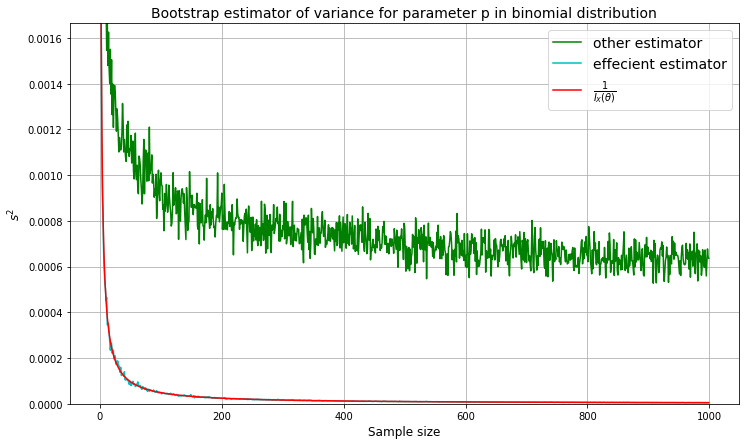

In [20]:
#строим графики для двух оценок и для величины, обратной информации Фишера
make_variance_plot(bin_param_variance, bin_new_variance, bin_information, 'p', 'binomial',  with_new_estimator = True)

<div style="text-align: justify">
Видно, что значение бутстрепной оценки дисперсии для другой оценки параметра больше, чем значение бутстрепной оценки дисперсии для эффективной оценки и для величины, обратной информации Фишера. Также построим график только для эффективной оценки и величины, обратной информации Фишера.
</div>

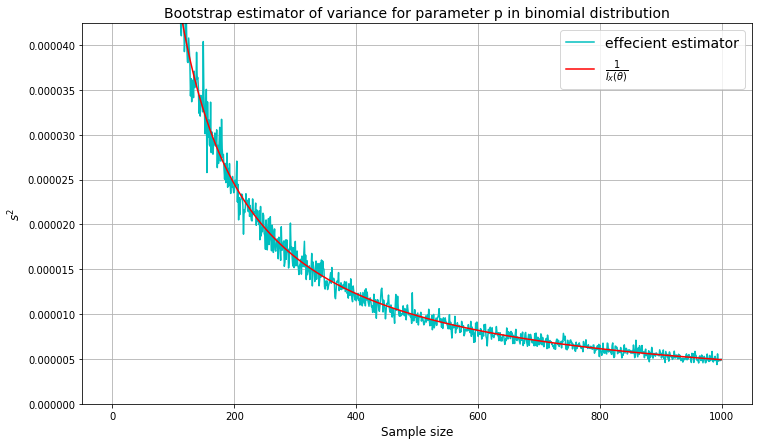

In [21]:
#строим графики для эффективной оценки и для величины, обратной информации Фишера
make_variance_plot(bin_param_variance, bin_new_variance, bin_information, 'p', 'binomial', with_new_estimator = False)

#### Нормальное распределение

In [22]:
#считаем бутстрепную оценку дисперсии для эффективной оценки для нормального распределения
norm_param_variance = param_bootstrap(norm_sample.shape[0], 
                                      lambda n: sts.norm.rvs(loc = eff_est_norm[n], scale = sigma, size = (K, n + 1)),
                                      lambda x: np.mean(x, axis = 1))

In [23]:
#считаем другую оценку параметра для нормального распределения
new_est_norm = np.array([np.median(norm_sample[:n]) for n in range(1, N + 1)])

In [24]:
#считаем бутстрепную оценку дисперсии для новой оценки для нормального распределения
norm_new_variance = param_bootstrap(norm_sample.shape[0], 
                                    lambda n: sts.norm.rvs(loc = new_est_norm[n], scale = sigma, size = (K, n + 1)),
                                    lambda x: np.median(x, axis = 1))

In [25]:
#считаем величину, обратную к информации Фишера
norm_information = sigma / np.arange(1, N + 1, 1)

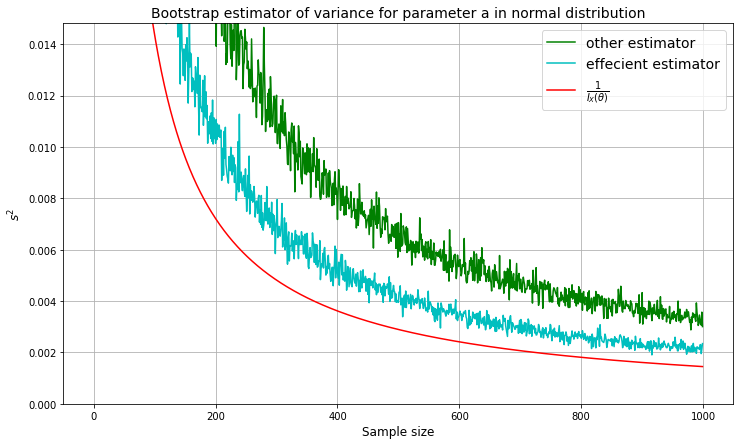

In [26]:
#строим графики для двух оценок и для величины, обратной информации Фишера
make_variance_plot(norm_param_variance, norm_new_variance, norm_information, 'a', 'normal', with_new_estimator = True)

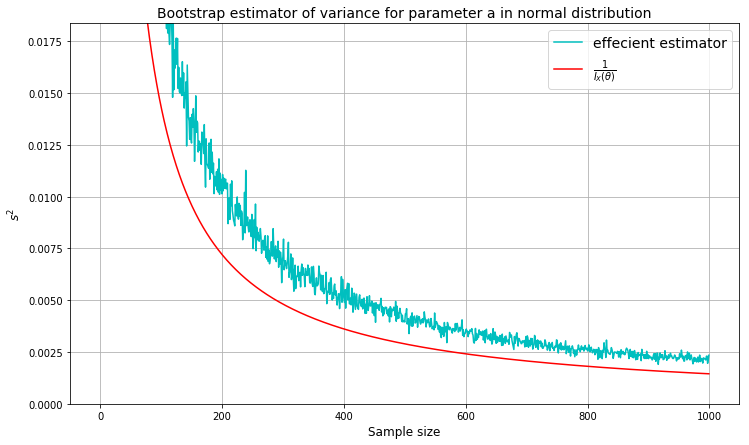

In [27]:
#строим графики для эффективной оценки и для величины, обратной информации Фишера
make_variance_plot(norm_param_variance, norm_new_variance, norm_information, 'a', 'normal', with_new_estimator = False)

#### Экспоненциальное распределение

In [69]:
#считаем бутстрепную оценку дисперсии для эффективной оценки для экспоненциального распределения
exp_param_variance = param_bootstrap(exp_sample.shape[0],
                                     lambda n: sts.expon.rvs(scale = 1 / eff_est_exp[n], size = (K, n + 1)),
                                     lambda x: np.mean(x, axis = 1))

In [70]:
#считаем другую оценку параметра для экспоненциального распределения
new_est_exp = np.array([(n - 1) / (n * exp_sample[:n].mean()) for n in range(1, N + 1)])

In [71]:
#считаем бутстрепную оценку дисперсии для новой оценки для экспоненциального распределения
exp_new_variance = param_bootstrap(exp_sample.shape[0],
                                  lambda n: sts.expon.rvs(scale = 1 / new_est_exp[n], size = (K, n + 1)), 
                                  lambda x: (x.shape[1] - 1) / (x.shape[1] * np.mean(x, axis = 1)))

/home/ilya/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


In [72]:
#считаем величину, обратную к информации Фишера
exp_information = random_param ** 2 / np.arange(1, N + 1, 1)

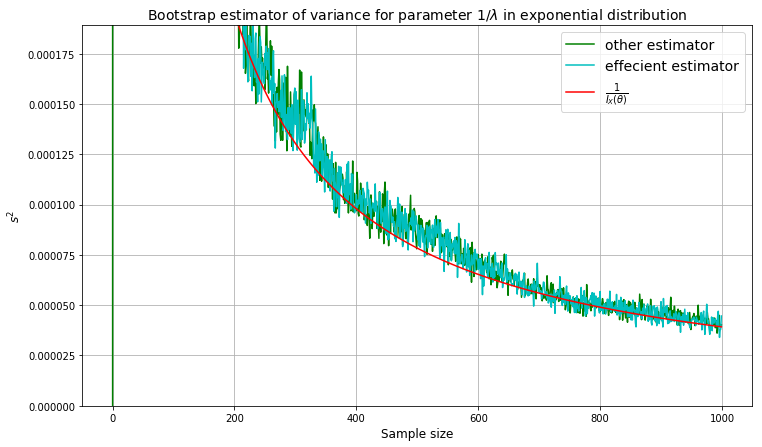

In [73]:
#строим графики для двух оценок и для величины, обратной информации Фишера
make_variance_plot(exp_param_variance, exp_new_variance, exp_information, r'$1 / \lambda$', 'exponential', with_new_estimator = True)

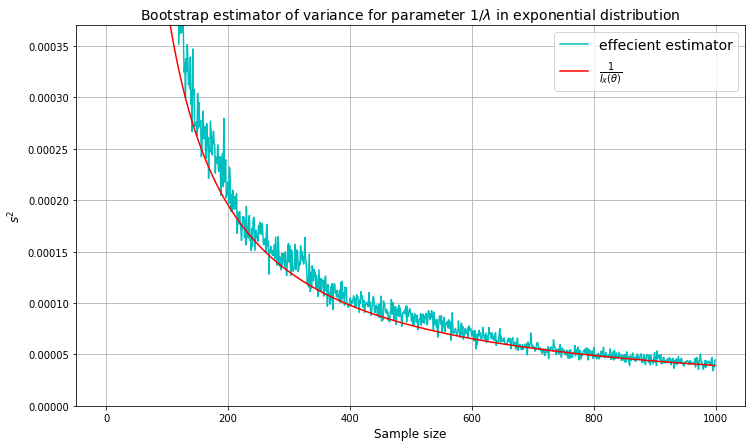

In [74]:
#строим графики для эффективной оценки и для величины, обратной информации Фишера
make_variance_plot(exp_param_variance, exp_new_variance, exp_information, r'$1 / \lambda$', 'exponential', with_new_estimator = False)

### Выводы

__Биномиальное распределение__ $Bin(m, \:\theta)$:
1. Исходя из полученных графиков, можно сделать вывод, что оценка $\theta^{*} = \frac{\overline{X}}{m}$ является эффективной оценкой параметра $\theta$, так как в неравенстве Рао-Крамера достигается равенство при данной оценке параметра.
2. Для другой несмещенной оценки $\frac{\overline{X}}{m}$ неравенство Рао-Крамера также выполняется, при этом неравенство строгое.

__Нормальное распределение__ $\mathcal{N}(\theta, \sigma^{2})$:
1. Исходя из полученных графиков, можно сделать вывод, что оценка $\theta^{*} = \overline{X}$ довольно близка к эффективной оценке параметра $\theta$ (графики для нижней оценки дисперсии в неравенстве Рао-Крамера и для дисперсии данной оценки лежат довольно близко, возможно, можно утверждать, что они совпадают).
2. Для другой несмещенной оценки (выборочной медианы) неравенство Рао-Крамера также выполняется, при этом неравенство строгое.

__Экспоненциальное распределение__ $Exp(1 / \theta)$:
1. Исходя из полученных графиков, можно сделать вывод, что оценка $\theta^{*} = \overline{X}$ является эффективной оценкой параметра $\theta$, так как в неравенстве Рао-Крамера достигается равенство при данной оценке параметра.
2. Для другой несмещенной оценки $\frac{n - 1}{n \overline{X}}$ неравенство Рао-Крамера также выполняется, при этом обе бутстрепные оценки дисперсии практически совпадают между собой и с нижней оценкой дисперсии. Поэтому данная оценка также является эффективной.

## Задача 3

<div style="text-align: justify">
Рассмотрим $X_1, \ldots, X_n \sim Bern(\theta)$. По сетке значений $\theta \in [0, 1]$ с шагом 0.01 постройте график зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера от $\theta$. Какой можно сделать вывод (напишите в комментариях)? Для каждого значения $\theta$ (для той же сетки) сгенерируйте выборку размера $n=1000$ для параметра $\theta$, посчитайте эффективную оценку $\theta$ и бутстрепную оценку дисперсии (параметрический бутстреп, количество бутстрепных выборок равно $500$) этой эффективной оценки $\theta$. Нарисуйте график зависимости полученных бутстрепных оценок от $\theta$.
</div>

### Теоретическая часть

<div style="text-align: justify">
Информация Фишера для распределения Бернулли с параметром $\theta$ равна $I_{X}(\theta) = \frac{n}{\theta (1 - \theta)}$. Тогда нижняя оценка дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера равна $\frac{\theta (1 - \theta)}{n}$. Эффективная оценка параметра $\theta$ для распределения Бернулли равна $\overline{X}$.
</div>

### Решение задачи

In [34]:
#создаем массив для параметра theta на отрезке [0, 1] с шагом 0.01
theta = np.arange(0, 1.01, 0.01)

In [35]:
#считаем нижнюю оценку дисперсии из неравенства Рао-Крамера 
#(не делим на какой-либо размер выборки, так как это не меняет качественно график)
lower_estimate = theta * (1 - theta)

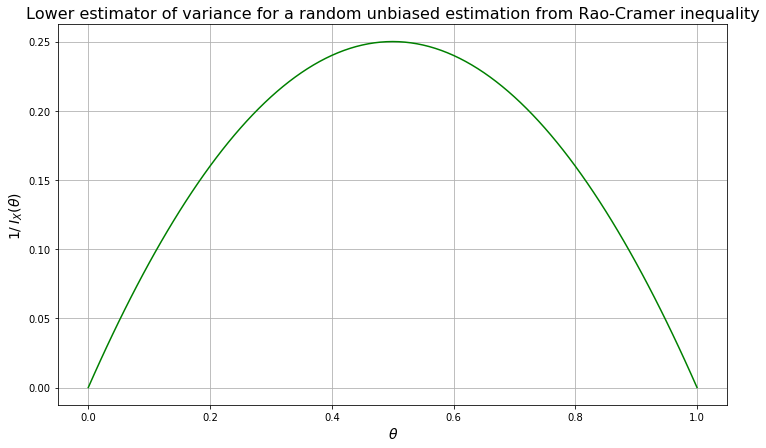

In [36]:
#строим график зависимости нижней оценки дисперсии произвольной несмещенной оценки от параметра theta
plt.figure(figsize = (12, 7))
plt.plot(theta, lower_estimate, color = 'g')
plt.title('Lower estimator of variance for a random unbiased estimation from Rao-Cramer inequality', fontsize = 16)
plt.xlabel(r'$\theta$', fontsize = 14)
plt.ylabel(r'$1 / \:I_{X}(\theta)$', fontsize = 14)
plt.grid()
plt.show()

Можно сделать вывод, что минимумы нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера достигаются при значения параметра $\theta = 0, \: \theta = 1$, а максимум достигается при $\theta = 0,5$.

In [37]:
#задаем размер выборки N и определяем количество различных значений параметра theta
N = 1000
num_params = theta.shape[0]

In [38]:
#для каждого значения параметра theta генерируем выборку размера N
samples = np.zeros((num_params, N))
for i in range(num_params):
    samples[i] = sts.bernoulli.rvs(theta[i], size = N)

In [39]:
#считаем значение эффективной оценки параметра theta
theta_eff = np.mean(samples, axis = 1)

In [40]:
#считаем бутстрепную оценку дисперсии эффективной оценки параметра theta
bern_param_variance = param_bootstrap(num_params,
                                     lambda n: sts.bernoulli.rvs(theta_eff[n], size = (K, N)),
                                     lambda x: np.mean(x, axis = 1))

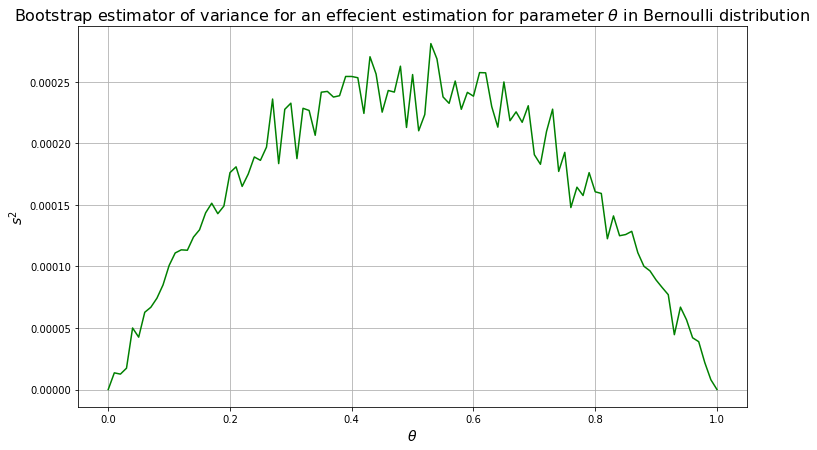

In [41]:
#строим график зависимости бутстрепной оценки дисперсии эффективной оценки параметра theta от параметра theta
plt.figure(figsize = (12, 7))
plt.plot(theta, bern_param_variance, color = 'g')
plt.title(r'Bootstrap estimator of variance for an effecient estimation for parameter $\theta$ in Bernoulli distribution',
          fontsize = 16)
plt.xlabel(r'$\theta$', fontsize = 14)
plt.ylabel(r'$s^{2}$', fontsize = 14)
plt.grid()
plt.show()

### Выводы

<div style="text-align: justify">
По построенным графикам зависимости нижней оценки дисперсии произвольной несмещенной оценки из неравенства Рао-Крамера и зависимости бутстрепной оценки дисперсии эффективной оценки параметра $\theta$ видно, что эти зависимости качественно совпадают, то есть для оценки $\theta^{*} = \overline{X}$ в неравенстве Рао-Крамера выполнено равенство. Таким образом, действительно, оценка $\theta^{*} = \overline{X}$ является эффективной оценкой параметра $\theta$ в распределении Бернулли с параметром $\theta$.
</div>